In [295]:
# initialization
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from google.colab import drive
import os
drive.mount('/content/drive')
import numpy as np
import time
import pandas as pd
from matplotlib.image import imread

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [296]:
# read in label
master_path = '/content/drive/MyDrive/APS360Project/archive/original_dataset_1/'
classes = pd.read_csv(os.path.join(master_path, "class_dict.csv"))
annotations = pd.read_csv(os.path.join(master_path, "metadata2.csv"))
print(annotations)

     image_id  split        sat_image_path              mask_path
0      100694  train  train/100694_sat.jpg  train/100694_mask.png
1      102122  train  train/102122_sat.jpg  train/102122_mask.png
2       10233  train   train/10233_sat.jpg   train/10233_mask.png
3      103665  train  train/103665_sat.jpg  train/103665_mask.png
4      103730  train  train/103730_sat.jpg  train/103730_mask.png
..        ...    ...                   ...                    ...
798    992507   test  train/992507_sat.jpg  train/992507_mask.png
799    994520   test  train/994520_sat.jpg  train/994520_mask.png
800    995492   test  train/995492_sat.jpg  train/995492_mask.png
801    997521   test  train/997521_sat.jpg  train/997521_mask.png
802    998002   test  train/998002_sat.jpg  train/998002_mask.png

[803 rows x 4 columns]


In [297]:
class_rgb = classes.set_index('name').T.to_dict('list') # in the sequence of r-g-b

In [385]:
def transform(path, class_rgb):
  img = imread(path)
  elements, counts = np.unique(img.reshape(-1, 3), return_counts=True, axis=0)
  total_counts = sum(counts)
  counts = (np.array(counts)/total_counts).tolist()
  elements = np.array(elements) * 255
  elements = elements.tolist()

  proportion = [list(class_rgb.keys()), np.array(list(class_rgb.values()))]
  proportion[1] = proportion[1] * 1.0
  proportion[1] = proportion[1].tolist()

  for k in range(len(proportion[0])):
    if proportion[1][k] in elements:
      index = elements.index(proportion[1][k])
      proportion[1][k] = counts[index]
    else:
      proportion[1][k] = 0
  #print(proportion)
  return list(proportion[1])

In [398]:
transformed_label = []
#len(annotations.index)
for i in range(len(annotations.index)):
  address = master_path + annotations['mask_path'][i]
  transformed_label.append([annotations['image_id'][i], annotations['split'][i], annotations['sat_image_path'][i], annotations['mask_path'][i]] + transform(address, class_rgb))

print(transformed_label)

KeyboardInterrupt: 

In [396]:
df = pd.DataFrame(transformed_label)
df.columns = ['image_id', 'split', 'sat_image_path', 'mask_path'] + list(class_rgb.keys())
df

,image_id,split,sat_image_path,mask_path,urban_land,agriculture_land,rangeland,forest_land,water,barren_land,unknown
0,100694,train,train/100694_sat.jpg,train/100694_mask.png,0,0.959111,0.040886,0,0,0,0.000003


In [391]:
df.to_csv('/content/drive/MyDrive/APS360Project/archive/original_dataset_1/proportion.csv', index=False)

[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]] [ 235534  347997 1706539 2965953  736681]


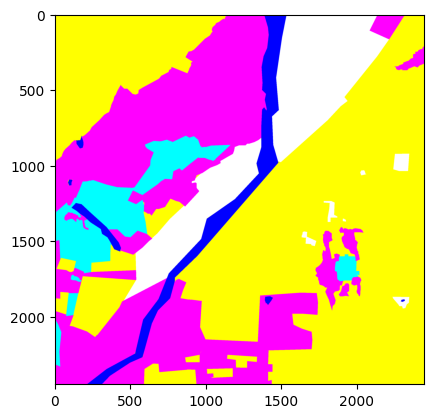

In [ ]:
#img = imread(master_path + annotations['mask_path'][i])
img = imread(master_path + 'train/965977_mask.png')
plt.imshow(img)
unique_elements, counts = np.unique(img.reshape(-1, 3), return_counts=True, axis=0)
print(unique_elements, counts)

In [ ]:
img.reshape(-1, 3)

array([[255., 255.,   0.],
       [255., 255.,   0.],
       [255., 255.,   0.],
       ...,
       [255., 255.,   0.],
       [255., 255.,   0.],
       [255., 255.,   0.]], dtype=float32)